In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape for CNN input (add channel dimension)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [2]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 409s 192ms/step - accuracy: 0.8213 - loss: 0.4873 - val_accuracy: 0.8759 - val_loss: 0.3506
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 282s 147ms/step - accuracy: 0.8857 - loss: 0.3115 - val_accuracy: 0.8903 - val_loss: 0.3046
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 323s 146ms/step - accuracy: 0.9020 - loss: 0.2643 - val_accuracy: 0.8981 - val_loss: 0.2885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 287s 125ms/step - accuracy: 0.9119 - loss: 0.2386 - val_accuracy: 0.8981 - val_loss: 0.2722
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 186s 84ms/step - accuracy: 0.9217 - loss: 0.2113 - val_accuracy: 0.9092 - val_loss: 0.2587
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 282s 126ms/step - accuracy: 0.9278 - loss: 0.1943 - val_accuracy: 0.9076 - val_loss: 0.2528
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 233s 124ms/step - accuracy: 0.9341 - loss: 0.1767 - val_accuracy: 0.9098 - val_loss: 0.2677
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 329s 158ms/step - acc

313/313 - 14s - 45ms/step - accuracy: 0.9078 - loss: 0.2848

Test Accuracy: 0.907800018787384


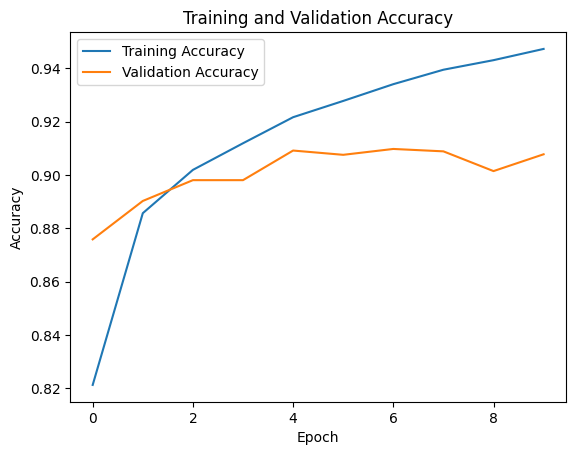

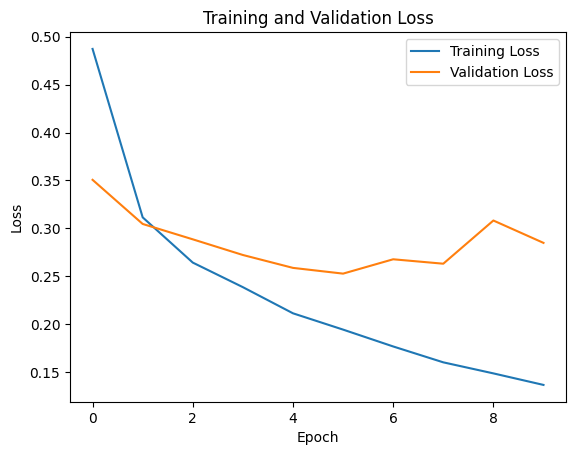

In [4]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy:", test_acc)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# 💾 Save model
model.save('cnn_model.h5')

print("✅ Model saved successfully as cnn_model.h5")


✅ Model saved successfully as cnn_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step


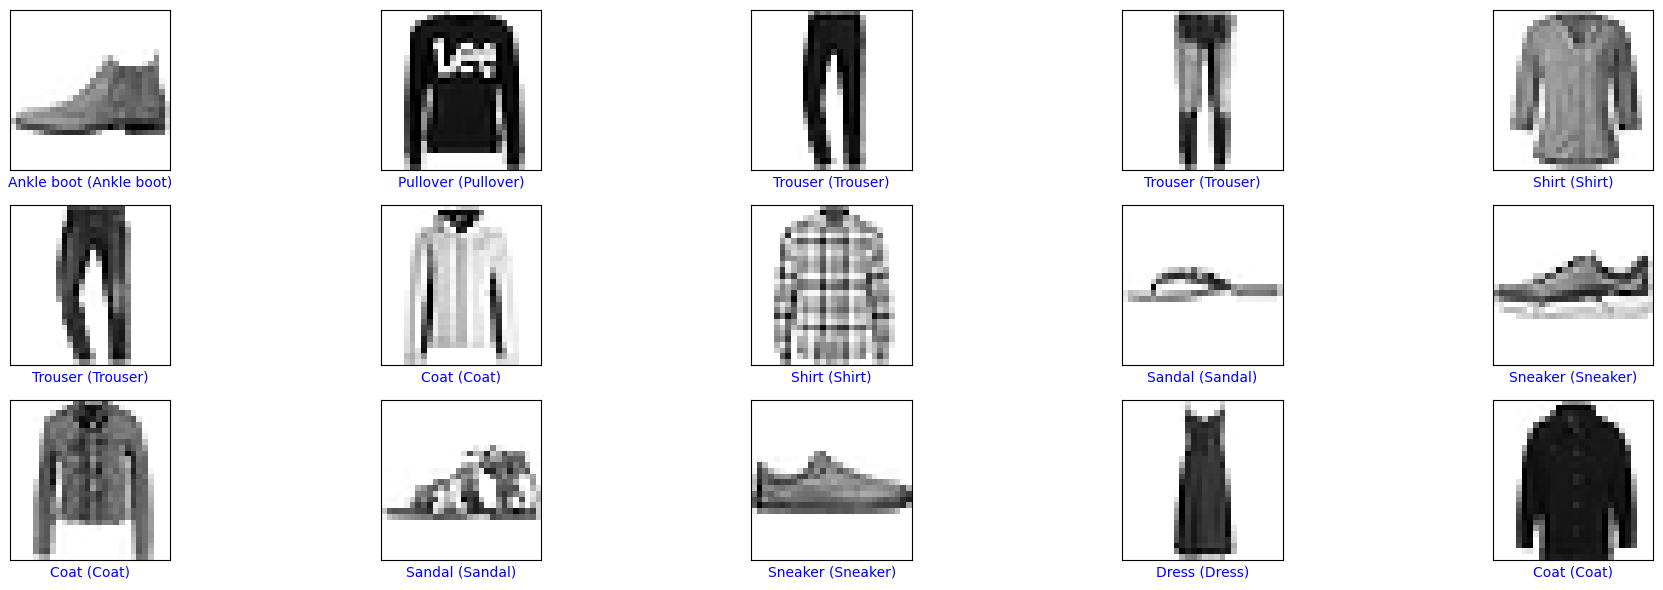

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist

# Load the saved model
model = load_model('cnn_model.h5')

# Load the dataset again for testing
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Normalize
x_test = x_test / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

# Make predictions
predictions = model.predict(x_test)

# Class names (for labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to show image + prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
                              color=color)

# Display first 15 test images with predictions
num_rows = 3
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()





Methodology

The project applies a Convolutional Neural Network (CNN) model to classify images from the Fashion MNIST dataset into ten categories of clothing and accessories such as T-shirts, trousers, shoes, and bags.
The methodology followed the steps below:

1. Dataset Loading and Preprocessing

   The Fashion MNIST dataset was imported directly from TensorFlow Keras.
   Training and testing data were split as `(x_train, y_train)` and `(x_test, y_test)`.
   All pixel values were normalized by dividing by 255.0 to improve convergence.
   Each image was reshaped from (28 × 28) to (28, 28, 1) to fit the CNN input format.

2. Model Architecture Design

   A Sequential CNN model was built with the following layers:

     Conv2D (32 filters, 3×3 kernel, ReLU activation)
     MaxPooling2D (2×2)
     Conv2D (64 filters, 3×3, ReLU activation)
     MaxPooling2D (2×2)
     Flatten layer to convert feature maps into a vector.
     Dense (128 units, ReLU activation)
     Output layer: Dense (10 units, Softmax activation) for multiclass prediction.

3. Model Compilation and Training

    The model was compiled using:

     Optimizer: Adam
     Loss function:sparse_categorical_crossentropy
     Metrics: accuracy
    It was trained for 5–10 epochs with batch size = 32.
    Training performance was monitored using validation accuracy.

4. Model Evaluation

    After training, the model was evaluated on the test dataset to obtain the final loss and accuracy.
    Accuracy achieved was printed to confirm model performance.

5. Prediction and Visualization

    The trained model was used to predict labels on unseen test images.
    Sample results were displayed with both predicted and true labels blue text for correct predictions, red for incorrect.

6. Model Saving

    The trained CNN model was saved as `cnn_model.h5` for reuse.
    It can later be loaded for further testing, deployment, or integration with a Streamlit interface.




In [1]:
import pickle

# Example: save class names and predictions for later use
data_to_save = {
    'class_names': ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    'y_pred': y_pred,
    'y_test': y_test
}

# Save to pickle file
with open('fashion_data.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print("✅ Data successfully saved to fashion_data.pkl")


NameError: name 'y_pred' is not defined